------
# Projeto Final - Aprendizagem de Máquina

- Felipe Siqueira e Mariana Martins
-------

## Dataset

[Link para o dataset](https://www.pns.icict.fiocruz.br/painel-de-indicadores-mobile-desktop/)

Para esse projeto, selecionamos os dados da **Pesquisa Nacional de Saúde (PNS)**, realizada pelo Ministério da Saúde em parceria com o Instituto Brasileiro de Geografia e Estatística (IBGE). A PNS é um inquérito de saúde de base domiciliar, abrangendo todo o território nacional, com edições realizadas nos anos de 2013 e 2019. Para este projeto, utilizaram-se os dados mais recentes, correspondentes ao ano de 2019, por oferecerem maior atualidade e relevância para a aplicação das técnicas de aprendizado de máquina propostas. <br> <br>

Ao iniciar a exploração do dataset, identificamos uma grande quantidade de dados, com 1.087 colunas e 300 mil linhas, organizadas em seções específicas de perguntas e com variáveis nomeadas por código, como mostrado abaixo. Diante da amplitude temática do banco de dados, foi necessário realizar uma seleção por tema, e decidimos concentrar nossa análise em diagnósticos de *depressão*, considerando a relevância desse tema e a abrangência de informações relacionadas presentes no conjunto de dado <br><br>

Após a definição do tema, realizamos uma redução dimensional, passando de 1.000 colunas para 38 relacionadas ao assunto. Para facilitar a manipulação e interpretação, as colunas foram renomeadas, substituindo os códigos por nomes mais descritivos. <br> <br>

## Conhecendo o Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregando o dataset 
df = pd.read_csv('pns2019.csv')

# Exibir todas as colunas do dataset
print(df.columns)

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022',
       'V0026', 'V0031', 'V0025A',
       ...
       'VDE002', 'VDE014', 'VDF002', 'VDF003', 'VDF004', 'VDL001', 'VDM001',
       'VDP001', 'VDR001', 'VDDATA'],
      dtype='object', length=1087)


In [3]:
# Exibir as primeiras 5 linhas do dataset
print(df.head())

   V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  V0031  \
0     11  1110011  110000016          1      1   2019    6.0      1      1   
1     11  1110011  110000016          1      1   2019    6.0      1      1   
2     11  1110011  110000016          1      1   2019    6.0      1      1   
3     11  1110011  110000016          1      1   2019    6.0      1      1   
4     11  1110011  110000016          1      1   2019    6.0      1      1   

   V0025A  ...  VDE002  VDE014  VDF002  VDF003  VDF004  VDL001  VDM001  \
0     1.0  ...     1.0     6.0  2098.0   350.0     2.0     NaN     NaN   
1     0.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
2     0.0  ...     1.0     4.0  2098.0   350.0     2.0     NaN     NaN   
3     9.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
4     9.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   

   VDP001  VDR001    VDDATA  
0     NaN     NaN  20210825  
1     NaN     NaN  2021082

In [3]:
# Exibir informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1078), int64(9)
memory usage: 2.4 GB


In [4]:
# Visualizando todas as colunas do dataset
print(df.columns.tolist())

['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B', 'A001', 'A002010', 'A003010', 'A004010', 'A01001', 'A011', 'A005010', 'A005012', 'A00601', 'A009010', 'A01401', 'A01402', 'A01403', 'A01501', 'A016010', 'A018011', 'A018012', 'A018013', 'A018014', 'A018015', 'A018016', 'A018017', 'A018018', 'A018019', 'A018020', 'A018021', 'A018022', 'A018023', 'A018024', 'A018025', 'A018026', 'A018027', 'A018028', 'A01901', 'A02101', 'A02102', 'A02201', 'A02305', 'A02306', 'A02307', 'A02308', 'A02401', 'A02402', 'B001', 'B002', 'B003', 'B004', 'C001', 'C00301', 'C004', 'C006', 'C00701', 'C00702', 'C00703', 'C008', 'C009', 'C01001', 'C010010', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C01801', 'C011', 'C012', 'D001', 'D00201', 'D00202', 'D00301', 'D00501', 'D006', 'D00601', 'D007', 'D008', 'D00901', 'D010', 'D01101', 'D01201', 'D01301', 'D01302', 'D01303', 'D014', 'D015', 'E001', 'E002', 'E003', 'E004', 'E005', 'E006011', 'E008', 'E010010'

## Tratamento de Dados Básico

A partir do [Painel de Indicadores de Saúde – Pesquisa Nacional de Saúde](https://www.pns.icict.fiocruz.br/painel-de-indicadores-mobile-desktop/), conseguimos mapear e identificar o significado de cada coluna nos dados. Com isso, iremos renomeá-las para melhorar a compreensão dos dad

Módulos disponiveis no dataset:

- Doenças Crônicas (Q-2019) 
- Estilo de Vida/Alimentação (P-2019)
- Estilo de Vida/Prática de Atividade Física (P-2019)
- Antropometria (W-2019)
- Utilização de Serviços de Saúde (J-2019)
- Percepção do Estado de Saúde (N-2019)
- Cobertura de Plano de Saúde (I-2019)
- Estilo de Vida/Consumo de Álcool (P-2019) <br>
- Acidentes (O-2019) <br>
- Violências (V-2019) <br>
- Estilo de vida / Consumo de álcool (P-2019) <br>
- Estilo de vida / Tabagismo (P-2019) <br>
- Saúde Bucal (U-2019) <br>
- Saúde da mulher (R-2019) <br>
- Saúde dos idosos (K-2019) <br>
- Deficiências (G-2019) <br>
- Saúde da mulher / pré-natal (S-2019) <br>
- Saúde da mulher / assistência ao parto (S-2019) <br>.


In [3]:
# Escolhendo as colunas desejadas e renomeá-las
colunas_desejadas = {
    'C006': 'Sexo',
    'C008': 'Idade',
    'V0026': 'Situação cens.',
    'M001': 'Entrevista',
    'M00203': 'Aptidão',
    'M00303': 'Dias trabalho',
    'N001': 'Aval. Saúde',
    'N00101': 'Bem estar',
    'N010': 'Frequência Problemas Sono',
    'N011': 'Frequência Indisposição',
    'N012': 'Frequência falta de prazer',
    'N013': 'Frequência falta concentração',
    'N014': 'Frequência problemas alimentação',
    'N015': 'Frequência Lentidão ou Agitação',
    'N016': 'Frequência sem perspectiva',
    'N017': 'Frequência sentimento de fracasso',
    'N018': 'Frequência ideação suicida',
    'P00102': 'Sabe o peso?',
    'P00103': 'Peso - info.',
    'P00104': 'Peso - Final',
    'P00402': 'Sabe a altura?',
    'P00403': 'Altura cm - info',
    'P00404': 'Altura cm - Final',
    'P005': 'Gravida?',
    'P027': 'Frequencia bebida alcoolica',
    'P034': 'Pratica exercícios físicos?',
    'P04502': 'Horas de tela',
    'P050': 'Fuma Tabaco atualmente?',
    'P051': 'Fumou diariamente no passado?',
    'P052': 'Fumou no passado?',
    'Q092': 'Diagnóstico depressão'
}

df_filtrado = df[list(colunas_desejadas.keys())].rename(columns=colunas_desejadas)
df_filtrado.head()

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Altura cm - info,Altura cm - Final,Gravida?,Frequencia bebida alcoolica,Pratica exercícios físicos?,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Diagnóstico depressão
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,145.0,145.0,2.0,2.0,1.0,1.0,3.0,NaN,1.0,1.0
1,1.0,69.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,31.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,9.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tratamento dos dados

```
Features (X): 'Sexo', 'Idade','Situação cens.', 'Entrevista', 'Aptidão', 'Dias trabalho', 'Aval. Saúde', etc.

Target (y): coluna 'Diagnóstico depressão'.
```
---

In [4]:
# Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas.
df_filtrado.describe()

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Altura cm - info,Altura cm - Final,Gravida?,Frequencia bebida alcoolica,Pratica exercícios físicos?,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Diagnóstico depressão
count,279382.000000,279382.000000,293726.000000,94111.000000,90840.000000,52832.000000,90846.000000,90846.000000,90846.000000,90846.000000,...,75637.000000,89954.000000,48047.000000,90846.000000,90846.000000,90846.000000,90846.000000,1186.000000,79460.000000,90846.000000
mean,1.518788,35.267651,1.236843,1.083019,1.021004,4.271616,2.322634,2.165544,1.665049,1.594335,...,165.420535,164.905841,1.986368,1.657585,1.599344,3.771525,2.762389,1.471332,2.427888,1.908284
std,0.499648,21.675970,0.425146,0.597202,0.196063,2.190128,0.817765,0.753347,1.035698,0.919173,...,9.758273,9.707327,0.135495,0.872154,0.490034,1.929889,0.636955,0.499388,0.882790,0.288626
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,106.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,...,159.000000,158.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
50%,2.000000,34.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,...,165.000000,165.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,2.000000,52.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,2.000000,2.000000,...,172.000000,171.000000,2.000000,3.000000,2.000000,6.000000,3.000000,2.000000,3.000000,2.000000
max,2.000000,112.000000,2.000000,9.000000,9.000000,8.000000,5.000000,5.000000,4.000000,4.000000,...,210.000000,206.000000,3.000000,3.000000,2.000000,6.000000,3.000000,2.000000,3.000000,2.000000


In [5]:
# vamos conferir se todas as colunas são do tipo 'float' ou 'int'
df_filtrado.dtypes

Sexo                                 float64
Idade                                float64
Situação cens.                         int64
Entrevista                           float64
Aptidão                              float64
Dias trabalho                        float64
Aval. Saúde                          float64
Bem estar                            float64
Frequência Problemas Sono            float64
Frequência Indisposição              float64
Frequência falta de prazer           float64
Frequência falta concentração        float64
Frequência problemas alimentação     float64
Frequência Lentidão ou Agitação      float64
Frequência sem perspectiva           float64
Frequência sentimento de fracasso    float64
Frequência ideação suicida           float64
Sabe o peso?                         float64
Peso - info.                         float64
Peso - Final                         float64
Sabe a altura?                       float64
Altura cm - info                     float64
Altura cm 

In [6]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df_filtrado.nunique().sort_values())


VALORES ÚNICOS:
Sexo                                   2
Fumou diariamente no passado?          2
Pratica exercícios físicos?            2
Sabe a altura?                         2
Sabe o peso?                           2
Diagnóstico depressão                  2
Situação cens.                         2
Fuma Tabaco atualmente?                3
Fumou no passado?                      3
Aptidão                                3
Frequencia bebida alcoolica            3
Gravida?                               3
Frequência sentimento de fracasso      4
Frequência Problemas Sono              4
Frequência Indisposição                4
Frequência falta de prazer             4
Frequência falta concentração          4
Frequência problemas alimentação       4
Frequência Lentidão ou Agitação        4
Frequência sem perspectiva             4
Frequência ideação suicida             4
Entrevista                             4
Aval. Saúde                            5
Bem estar                              5

Percebe-se que existem algumas respostas dados por pessoas não-aptas, pensando nisso, trabalharemos com os dados apenas de pessoas adultas e aptas

In [8]:
df_Aptos = df_filtrado[(df_filtrado['Entrevista'] == 1) & (df_filtrado['Aptidão'] == 1)]
df_Aptos

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Altura cm - info,Altura cm - Final,Gravida?,Frequencia bebida alcoolica,Pratica exercícios físicos?,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Diagnóstico depressão
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,145.0,145.0,2.0,2.0,1.0,1.0,3.0,NaN,1.0,1.0
9,2.0,19.0,1,1.0,1.0,0.0,2.0,2.0,1.0,1.0,...,152.0,152.0,2.0,2.0,2.0,5.0,1.0,NaN,NaN,2.0
10,2.0,45.0,1,1.0,1.0,6.0,3.0,1.0,1.0,3.0,...,155.0,155.0,2.0,3.0,2.0,2.0,3.0,NaN,1.0,2.0
18,2.0,58.0,1,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,NaN,159.0,2.0,1.0,1.0,4.0,3.0,NaN,3.0,2.0
19,2.0,28.0,1,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,176.0,176.0,2.0,1.0,1.0,1.0,3.0,NaN,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,2.0,54.0,2,1.0,1.0,5.0,3.0,2.0,1.0,2.0,...,168.0,168.0,2.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
293712,1.0,44.0,2,1.0,1.0,6.0,2.0,2.0,2.0,1.0,...,168.0,168.0,NaN,3.0,2.0,4.0,1.0,NaN,NaN,2.0
293713,2.0,32.0,2,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,163.0,163.0,2.0,1.0,1.0,5.0,3.0,NaN,1.0,2.0
293718,1.0,54.0,2,1.0,1.0,0.0,3.0,3.0,1.0,1.0,...,168.0,168.0,NaN,1.0,1.0,6.0,3.0,NaN,3.0,1.0


Percebe-se a quantidade de colunas relacionada ao peso e altura, por isso vamos reduzi-las a apenas 'Altura' e 'peso' e 'IMC'

In [10]:
colunas_especificas = [
    'Sabe o peso?',
    'Peso - info.',
    'Peso - Final',
    'Sabe a altura?',
    'Altura cm - info',
    'Altura cm - Final'
]

df_Aptos[colunas_especificas]

,Sabe o peso?,Peso - info.,Peso - Final,Sabe a altura?,Altura cm - info,Altura cm - Final
0,1.0,60.0,60.0,1.0,145.0,145.0
9,1.0,65.0,65.0,1.0,152.0,152.0
10,1.0,77.0,77.0,1.0,155.0,155.0
18,2.0,NaN,56.0,2.0,NaN,159.0
19,1.0,55.0,55.0,1.0,176.0,176.0
...,...,...,...,...,...,...
293709,1.0,63.0,63.0,1.0,168.0,168.0
293712,1.0,72.0,72.0,1.0,168.0,168.0
293713,1.0,87.0,87.0,1.0,163.0,163.0
293718,1.0,89.0,89.0,1.0,168.0,168.0


In [11]:
# Selecionar o peso/altura final e, se estiver faltando, usar o peso/altura informado
df_Aptos.loc[:, 'Peso'] = df_Aptos['Peso - Final'].fillna(df_Aptos['Peso - info.'])
df_Aptos.loc[:, 'Altura'] = df_Aptos['Altura cm - Final'].fillna(df_Aptos['Altura cm - info'])

df_Aptos.loc[:, 'IMC'] = df_Aptos['Peso'] / ((df_Aptos.loc[:,'Altura'] / 100) ** 2)

# Agora que adicionamos IMC, podemos retirar as colunas_especificas
df_Aptos = df_Aptos.drop(columns=colunas_especificas)

df_Aptos

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Frequencia bebida alcoolica,Pratica exercícios físicos?,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Diagnóstico depressão,Peso,Altura,IMC
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,2.0,1.0,1.0,3.0,NaN,1.0,1.0,60.0,145.0,28.537455
9,2.0,19.0,1,1.0,1.0,0.0,2.0,2.0,1.0,1.0,...,2.0,2.0,5.0,1.0,NaN,NaN,2.0,65.0,152.0,28.133657
10,2.0,45.0,1,1.0,1.0,6.0,3.0,1.0,1.0,3.0,...,3.0,2.0,2.0,3.0,NaN,1.0,2.0,77.0,155.0,32.049948
18,2.0,58.0,1,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,1.0,4.0,3.0,NaN,3.0,2.0,56.0,159.0,22.151023
19,2.0,28.0,1,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,3.0,NaN,3.0,2.0,55.0,176.0,17.755682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,2.0,54.0,2,1.0,1.0,5.0,3.0,2.0,1.0,2.0,...,3.0,2.0,1.0,1.0,NaN,NaN,2.0,63.0,168.0,22.321429
293712,1.0,44.0,2,1.0,1.0,6.0,2.0,2.0,2.0,1.0,...,3.0,2.0,4.0,1.0,NaN,NaN,2.0,72.0,168.0,25.510204
293713,2.0,32.0,2,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,1.0,1.0,5.0,3.0,NaN,1.0,2.0,87.0,163.0,32.744928
293718,1.0,54.0,2,1.0,1.0,0.0,3.0,3.0,1.0,1.0,...,1.0,1.0,6.0,3.0,NaN,3.0,1.0,89.0,168.0,31.533447


Como em qualquer projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

In [14]:
df_Aptos.isnull().sum()

Sexo                                     0
Idade                                    0
Situação cens.                           0
Entrevista                               0
Aptidão                                  0
Dias trabalho                        36498
Aval. Saúde                              0
Bem estar                                0
Frequência Problemas Sono                0
Frequência Indisposição                  0
Frequência falta de prazer               0
Frequência falta concentração            0
Frequência problemas alimentação         0
Frequência Lentidão ou Agitação          0
Frequência sem perspectiva               0
Frequência sentimento de fracasso        0
Frequência ideação suicida               0
Gravida?                             41964
Frequencia bebida alcoolica              0
Pratica exercícios físicos?              0
Horas de tela                            0
Fuma Tabaco atualmente?                  0
Fumou diariamente no passado?        87956
Fumou no pa

Como observado acima, temos diversos dados faltantes pensando nisso iremos retira-los, <br>
Como a maioria das colunas apresentam valores 'NaN' em grande quantidade, ao usar o dropna(), podemos ter bastante perda dos dados, por isso vamos usar outra estrategia.

- A técnica que vamos aplicar precisa ser aplicada depois que os dados forem divididos em treino e teste. Isso deve ser feito para evitar que haja possíveis vazamentos de informação quando for feito o cálculo da média, mediana ou moda no conjunto de dados completo. 

In [16]:
# Separando os dados (X, y) entre treinamento e teste
X = df_Aptos.drop('Diagnóstico depressão', axis=1)
y = df_Aptos['Diagnóstico depressão']

# 80% dos dados para treinamento e 20% para teste (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibindo as dimensões dos conjuntos
print(f"Número de exemplos no conjunto de treinamento: {X_train.shape[0]}")
print(f"Número de exemplos no conjunto de teste: {X_test.shape[0]}")

Número de exemplos no conjunto de treinamento: 71308
Número de exemplos no conjunto de teste: 17827


### Distribuição Train

Como destacado antes, para tratar os valores nulos vamos substituir esses valores. Porém para este método é preciso levar em consideração se a distribuição é simétrica (distribuição normal ou gaussina) ou assimétrica (apresenta algum tipo de desvio, muitos outliers). <br>

Vamos plotar o bloxplot das colunas, para ter uma noção se os nossos dados podem ou não ter uma distribuição normal baseado na quantidade de outlinears.

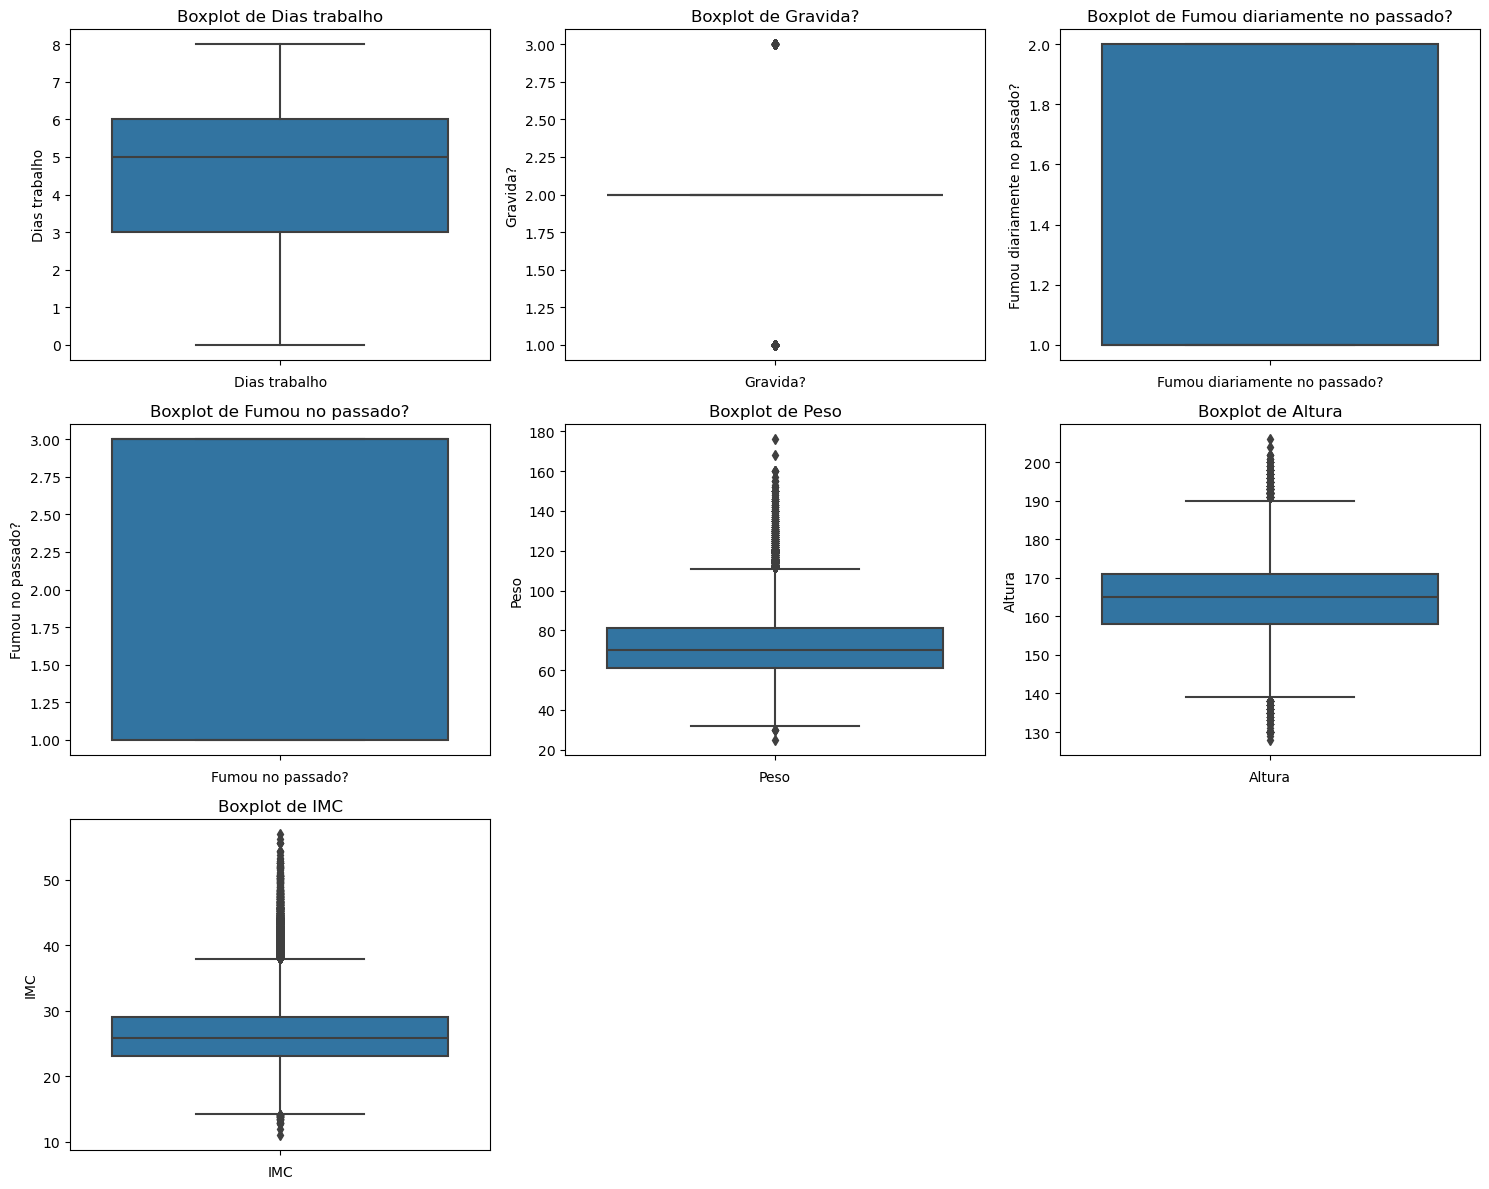

In [17]:
# Listar colunas numéricas que têm NaN
colunas_com_nan = ['Dias trabalho', 'Gravida?', 'Fumou diariamente no passado?', 'Fumou no passado?', 'Peso', 'Altura', 'IMC']
# A mediana é uma boa escolha em caso de outliers.

# Criar boxplots para colunas numéricas com NaN
n_colunas = len(colunas_com_nan)
n_linhas = (n_colunas // 3) + (n_colunas % 3 > 0)

plt.figure(figsize=(15, n_linhas * 4))
for i, coluna in enumerate(colunas_com_nan):
    plt.subplot(n_linhas, 3, i + 1)
    sns.boxplot(y= df_Aptos[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)

plt.tight_layout()
plt.show()

Note que a distribuição não é normal. Vamos usar o StandardScaler para normalizar essas colunas.

In [19]:
colunas_normalizar = ['Peso', 'Altura', 'IMC']

scaler = StandardScaler()

# Ajustar apenas no conjunto de treinamento
X_train_normalized = scaler.fit_transform(X_train[colunas_normalizar])

# Substituir as colunas normalizadas
X_train[colunas_normalizar] = X_train_normalized

Agora vamos subtituir os valores 'NaN'

In [20]:
# Substituir NaNs pela média ou mediana
for coluna in colunas_com_nan:
    if coluna in ['Peso', 'Altura', 'IMC']:  # Colunas com outliners, preencher com mediana
        valor_substituicao = df_Aptos[coluna].median()
    else:
        valor_substituicao = df_Aptos[coluna].mean()
    
    # Substitui os NaNs pelo valor calculado
    df_Aptos[coluna] = df_Aptos[coluna].fillna(valor_substituicao)

# Exibir os valores NaN após a substituição para verificar se todos foram preenchidos
print("\nValores NaN após a substituição:")
print(df_Aptos.isnull().sum())


Valores NaN após a substituição:
Sexo                                 0
Idade                                0
Situação cens.                       0
Entrevista                           0
Aptidão                              0
Dias trabalho                        0
Aval. Saúde                          0
Bem estar                            0
Frequência Problemas Sono            0
Frequência Indisposição              0
Frequência falta de prazer           0
Frequência falta concentração        0
Frequência problemas alimentação     0
Frequência Lentidão ou Agitação      0
Frequência sem perspectiva           0
Frequência sentimento de fracasso    0
Frequência ideação suicida           0
Gravida?                             0
Frequencia bebida alcoolica          0
Pratica exercícios físicos?          0
Horas de tela                        0
Fuma Tabaco atualmente?              0
Fumou diariamente no passado?        0
Fumou no passado?                    0
Diagnóstico depressão         

In [21]:
# Salvando os dados como CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)